# Traffic Crashes in Chicago

* Student name: Kinoti Martin Mwenda
* Student pace: Full-time
* Scheduled project review date/time: 26th May 2023
* Instructor name: Nikita Njoroge
* Blog post URL

## 1. Project Overview

The main aim of this project is to analyse `Traffic Crashes` dataset in the city of Chicago, as directed by the government. Through this analysis, we are to achieve the following:

* Identify the areas within the city with the most number of traffic accidents.
* Determine the main causes of the increased number of traffic accidents in the city.
* Come up with a model that given the identified accident contributors, can predict the likelihood of such incideces taking place

### 1.1 Problem Statement

The government of Chicago- Law Enforcement- has recorded an increase in traffic accidents on their roads. We are tasked to flag some of the leading contributors to this, and come up with recommendations on the same.

## 1.2 Objectives

#### Main Objective
To create an accurate model that predicts future trends on traffic accidents in the city of Chicago, given the contributing features.


#### Specific Objectives

To determine how different features such as weather condition, and speed influence occurence of traffic accidents.
To come up with recommendations on the measures to be taken, to ensure that traffic acciedents are minimized.

## 1.3 Project Design

This project is broken down into various categories, which are:

* Data Exploration & Analysis
* Data Preprocessing
* Modelling
* Conclusions
* Recommendations

## 1.4 Data Feature Description

The features of this dataset that have been used in modelling include: 
* crash_record_id: This is the unique identifier of the data,
* rd_no: The specific road
* crash_date: The date of the crash
* posted_speed_limit: the speed at time of the accident.
* traffic_control_device: device controlling the traffic
* device_condition: the condition of the traffic control device
* weather_condition:weather condition at time of the accident,
* lighting_condition: road lighting condition
* trafficway_type: type of traffic involved
* lane_cnt: number of lanes on the road
* alignment: the alighnment of the road at crash spot
* roadway_surface_cond: the general condition of the road
* road_defect: the defect present on the road surface
* crash_type: the type of crush involved- either there was injuries or not
* intersection_related_i: whether the accident occured at an intersection 
* not_right_of_way_i: no right of way in place
* hit_and_run_i: hit and run incident
* damage: the general degree of damages observed
* prim_contributory_cause: the main cause of the accident
* dooring_i: vehicle door related accidents
* work_zone_i: construction work zone
* work_zone_type: construction type
* workers_present_i: number of workers present on site
* most_severe_injury, injuries_total, injuries_fatal, injuries_incapacitating, injuries_non_incapacitating,injuries_reported_not_evident, injuries_no_indication
* crash_hour: time of the crash
* crash_day_of_week: the week of the crash
* crash_month: the month of the crash
* latitude, longitude, location: location where the accident took place

# 2. Data Exploration & Analysis

## 2.1 Data Cleaning & Exploration

In [245]:
# Relevant libraries
# importing libraries for data handling
import numpy as np
import pandas as pd
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for data handling
import numpy as np
import pandas as pd

# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for modeling
from sklearn import metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# importing libraries for statistics
import scipy.stats as stats
# importing libraries for styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

# For Mapping
import geopandas as gpd # geospatial data
from shapely.geometry import Point
import folium #interactive leaflet map
from folium.plugins import FloatImage
from shapely.geometry import Point


In [126]:
# Loading the dataset and asigning it to the variable "data" using pandas
data = pd.read_csv("Traffic_Crashes_-_Crashes.csv")
# Sampling the large dataset for analysis

In [127]:
# Sampling the data for analysis
data_sample = data.sample(n=60000, replace=False, random_state=123)
data_sample.reset_index(drop=True, inplace=True)
print(data_sample.shape)
data_sample.head()

(60000, 49)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,18304bb6fdb5804a3effd1a598a78bf3dc9c07111befe4...,JA484827,NaN,10/24/2017 11:15:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,23,3,10,41.853074,-87.618898,POINT (-87.618897962591 41.853074038781)
1,325b50af5f1b0f6d95622d524116d2cbd879bb0be9d93b...,JF461491,NaN,11/04/2022 02:50:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,...,0.0,0.0,1.0,0.0,2,6,11,41.857849,-87.616841,POINT (-87.616840879395 41.857849087118)
2,bdfa523cdf7e77aa7cb9e58421f70435852dc4f536571f...,JC267785,NaN,05/18/2019 05:20:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAWN,REAR END,...,0.0,0.0,3.0,0.0,5,7,5,41.857474,-87.685969,POINT (-87.685968604685 41.857474370968)
3,beb2bb00c87a0dacae6a7cf25018023c9337b8d5d6091b...,JC300323,NaN,06/10/2019 01:05:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,13,2,6,41.706465,-87.681770,POINT (-87.681770004194 41.706464557469)
4,8ecd0b725fa8e42df7e3be837c5c4c08741c9108d79ea7...,JE238494,Y,05/22/2021 01:00:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,1,7,5,41.916086,-87.805536,POINT (-87.805535993338 41.916085623272)


In [128]:
# Change the column names to lower case, and briefly describe the data types
def info(data):
    # Convert columns to lower case
    data.columns = data.columns.str.lower()
    # Data type description
    print("Data Info")
    print(data.info())
    # Check for missing values, and quantities
    print("--------------")
    print("Missing values")
    print(((data.isna().sum())/len(data)).sort_values(ascending = False))
    # Check for duplicates
    print("---------------------")
    print("Duplicates:", data.crash_record_id.duplicated().sum())

In [129]:
# Display the data info
info(data_sample)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                60000 non-null  object 
 1   rd_no                          59592 non-null  object 
 2   crash_date_est_i               4501 non-null   object 
 3   crash_date                     60000 non-null  object 
 4   posted_speed_limit             60000 non-null  int64  
 5   traffic_control_device         60000 non-null  object 
 6   device_condition               60000 non-null  object 
 7   weather_condition              60000 non-null  object 
 8   lighting_condition             60000 non-null  object 
 9   first_crash_type               60000 non-null  object 
 10  trafficway_type                60000 non-null  object 
 11  lane_cnt                       16560 non-null  float64
 12  alignment                      60000

### Data Cleaning

This steps involves:

* Removal of duplicates, if any.
* Dealing with missing values
* Data preparation -- numerical & categorical DataFrames

In [130]:
# Function to deal with missing values
def missing_(data):
    # workers_present_i column: replace the null instances with "unknown"
    data["workers_present_i"].fillna("unknown", inplace=True)
    # dooring_i column: we take that the missing values represent areas with no accidents 
    # involving car doors.
    data["dooring_i"].fillna("N", inplace=True)
    # work_zone_type: replace the missing values with "None", since no construction was taking place
    data["work_zone_type"].fillna("None", inplace=True)
    # work_zone_i: replace the missing values with "N"--since no construction was taking place in these
    # places
    data["work_zone_i"].fillna("N", inplace=True)
    # Drop target unrelated columns with missing values
    data.drop(["photos_taken_i", "statements_taken_i", "crash_date_est_i", "not_right_of_way_i"], inplace=True, axis=1)
    # Fill missing values in column-"lane_cnt" with the midian value
    data["lane_cnt"].fillna(data_sample.lane_cnt.median(), inplace=True)
    # fill null values in the "hit_and_run_column" with "unknown"
    data["hit_and_run_i"].fillna("unknown", inplace=True)
    # Fillna in "intersection_related_i" with "unknown"
    data["intersection_related_i"].fillna("unknown", inplace=True)
    # Drop the data in columns of the latitude and longitudes where the value == 0
    # Drop the other null values in the dataset since they are minimal
    data.dropna(inplace=True) 

In [131]:
# Load the data to the function to handle the missing values
missing_(data_sample)

In [132]:
# Check to ensure that all the parameters have been updated
info(data_sample)

Data Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57418 entries, 0 to 59999
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crash_record_id                57418 non-null  object 
 1   rd_no                          57418 non-null  object 
 2   crash_date                     57418 non-null  object 
 3   posted_speed_limit             57418 non-null  int64  
 4   traffic_control_device         57418 non-null  object 
 5   device_condition               57418 non-null  object 
 6   weather_condition              57418 non-null  object 
 7   lighting_condition             57418 non-null  object 
 8   first_crash_type               57418 non-null  object 
 9   trafficway_type                57418 non-null  object 
 10  lane_cnt                       57418 non-null  float64
 11  alignment                      57418 non-null  object 
 12  roadway_surface_cond           57418

## 2.2 Data Analysis

#### Univariate Analysis

In [262]:
# Selection of columns for use in analysis
cols = ["work_zone_i", "injuries_total", "injuries_fatal", "crash_month", "dooring_i","crash_hour", 
        "lighting_condition", "traffic_control_device", "device_condition",
        "weather_condition", "trafficway_type", "roadway_surface_cond", "intersection_related_i",
        "road_defect", "damage", "crash_type", "prim_contributory_cause"]
data = data_sample[cols]
data.head()

,work_zone_i,injuries_total,injuries_fatal,crash_month,dooring_i,crash_hour,lighting_condition,traffic_control_device,device_condition,weather_condition,trafficway_type,roadway_surface_cond,intersection_related_i,road_defect,damage,crash_type,prim_contributory_cause
0,N,0.0,0.0,10,N,23,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NO CONTROLS,CLEAR,NOT DIVIDED,WET,Y,NO DEFECTS,"OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,NOT APPLICABLE
1,N,0.0,0.0,11,N,2,"DARKNESS, LIGHTED ROAD",TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,FOUR WAY,DRY,unknown,UNKNOWN,"OVER $1,500",INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE
2,N,0.0,0.0,5,N,5,DAWN,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,T-INTERSECTION,DRY,unknown,NO DEFECTS,$500 OR LESS,NO INJURY / DRIVE AWAY,FOLLOWING TOO CLOSELY
3,N,0.0,0.0,6,N,13,DAYLIGHT,NO CONTROLS,NO CONTROLS,CLEAR,NOT DIVIDED,DRY,unknown,UNKNOWN,"OVER $1,500",NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE
4,N,0.0,0.0,5,N,1,"DARKNESS, LIGHTED ROAD",NO CONTROLS,NO CONTROLS,CLEAR,NOT DIVIDED,DRY,unknown,NO DEFECTS,"OVER $1,500",NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE


In [263]:
# Split the dataset into numerical and categorical DataFrames
data_cat = data.select_dtypes("object")
data_num = data.select_dtypes("number")

* Categorical Columns

In [264]:
# Function for value_counts for the categorical columns, and create visualizations
def cat_analysis(data):
    for column in data:
        val_counts = data[column].value_counts().sort_values(ascending=True)
        # Plotting the data
        fig, ax = plt.subplots(figsize=(15,8))
        ax.barh(val_counts.index, val_counts.values)
        ax.set_xlabel(column)
        ax.set_ylabel("Value Counts")

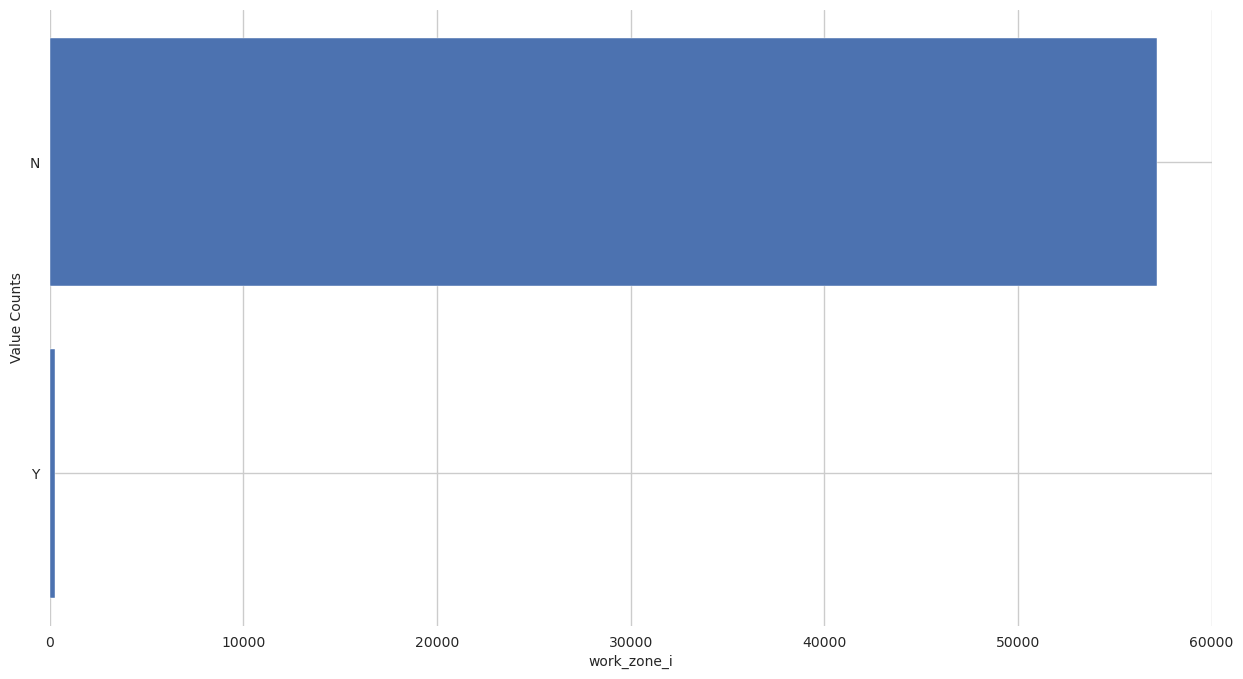

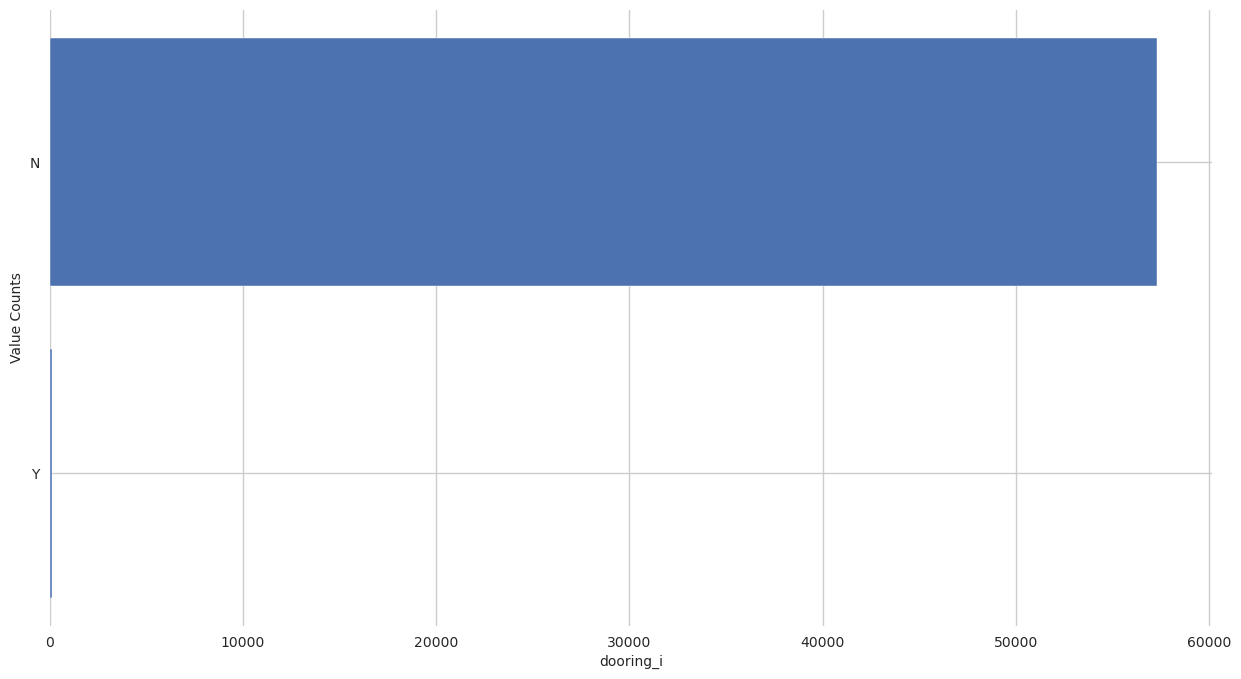

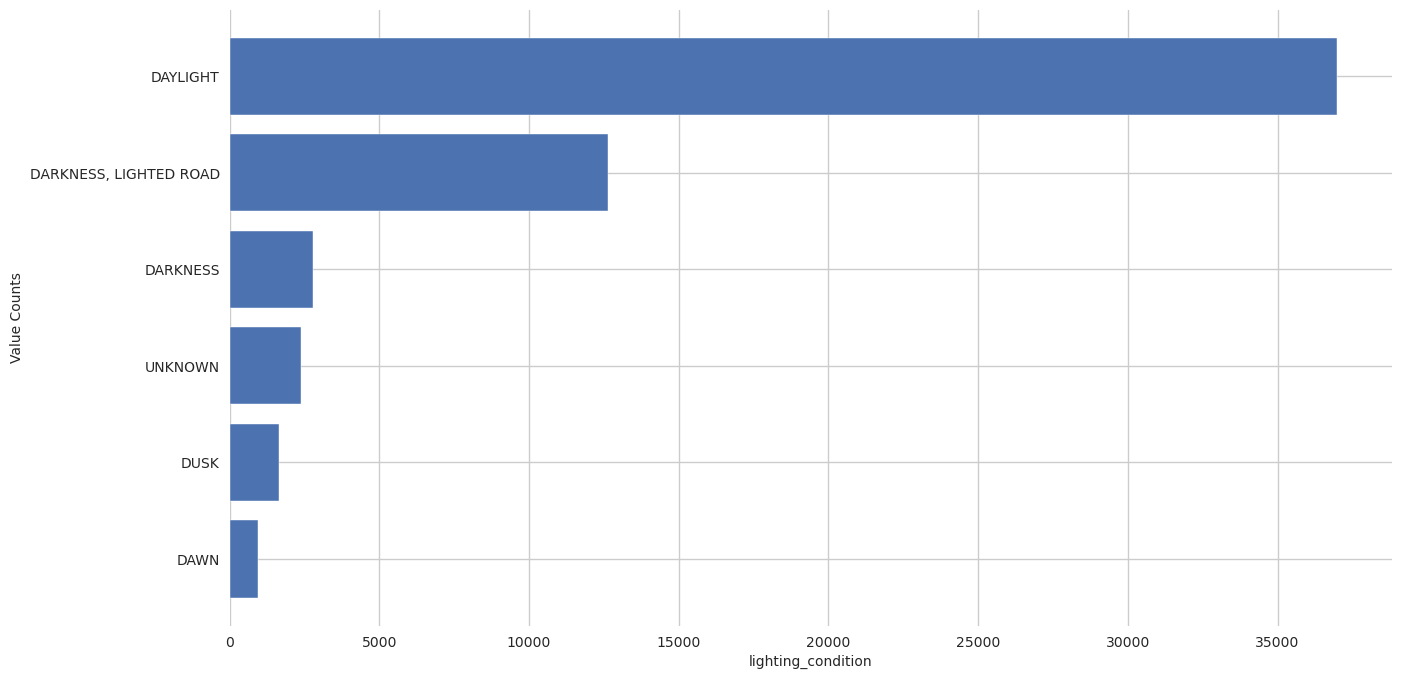

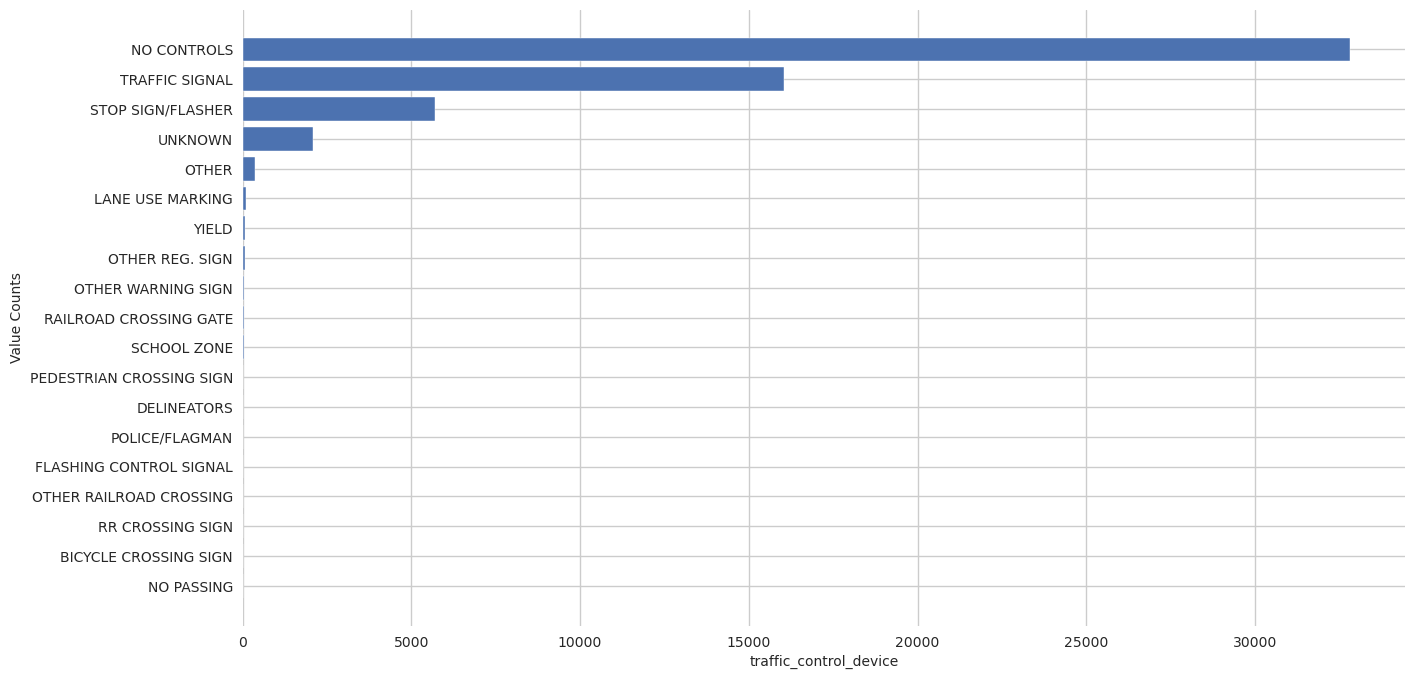

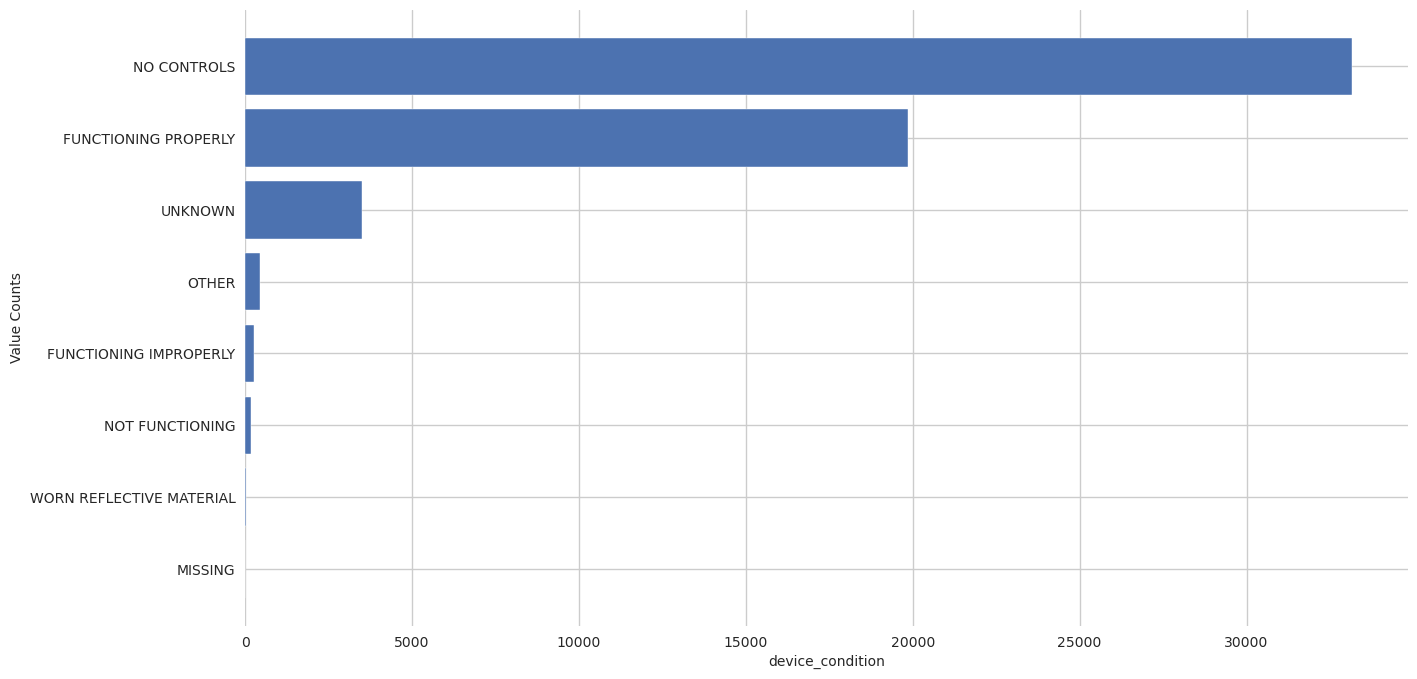

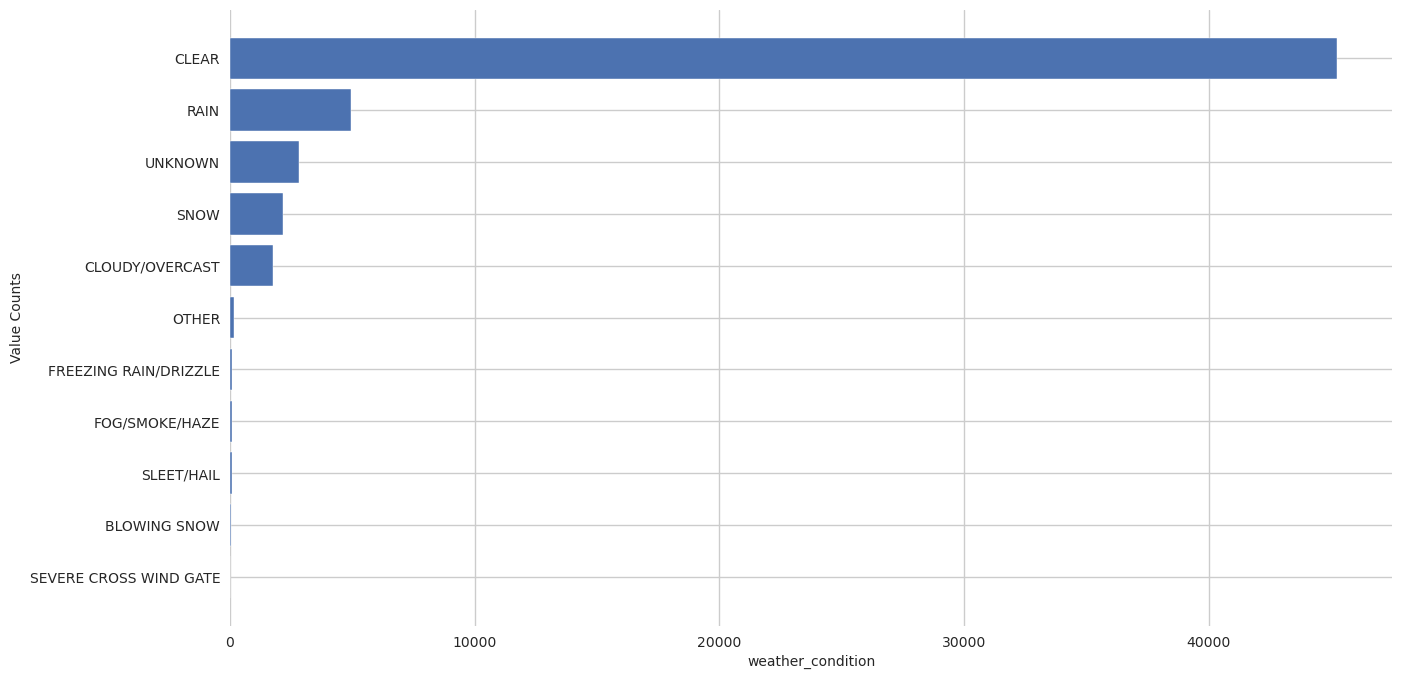

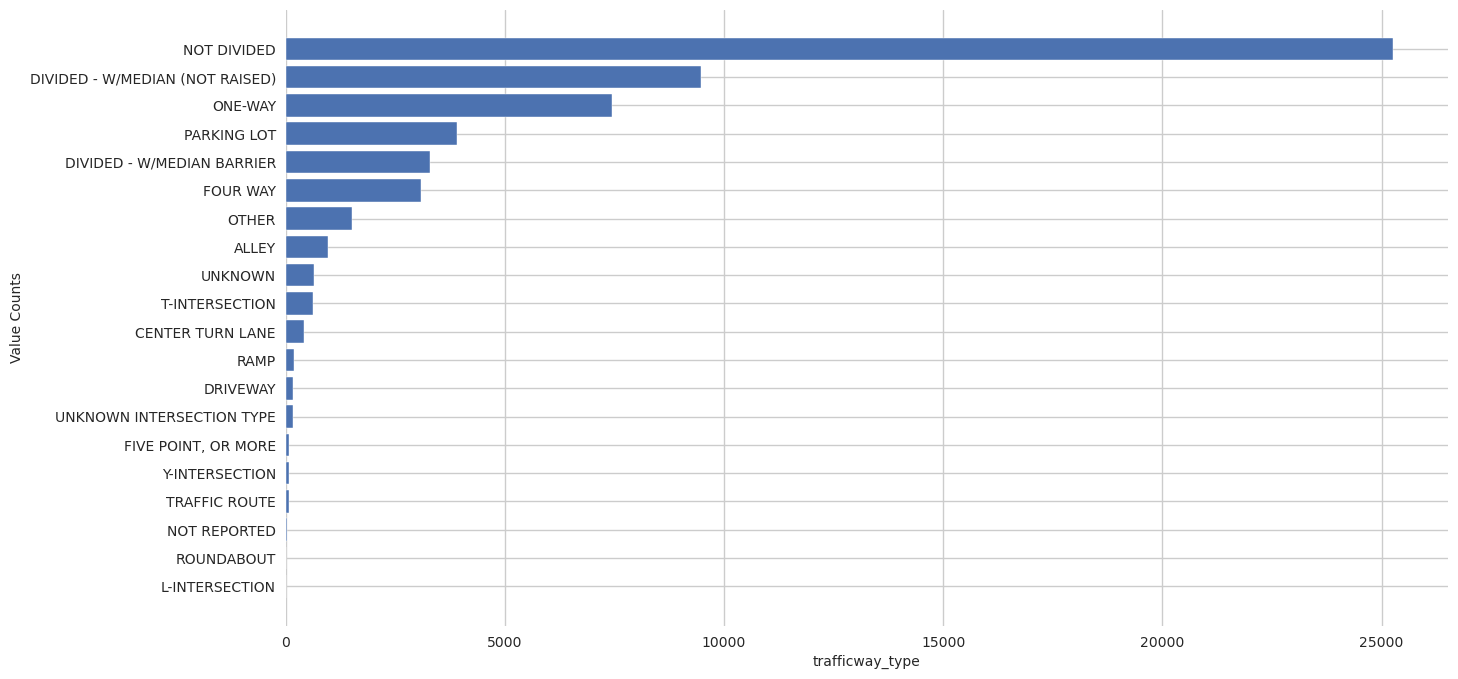

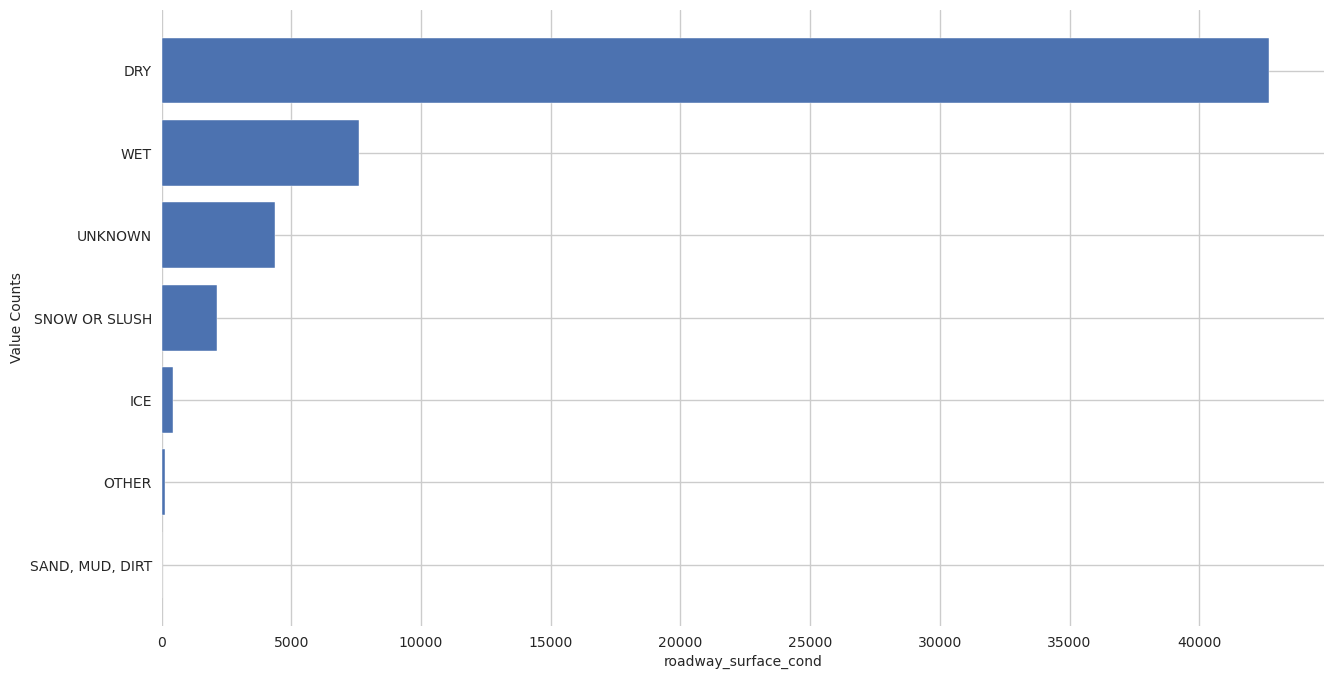

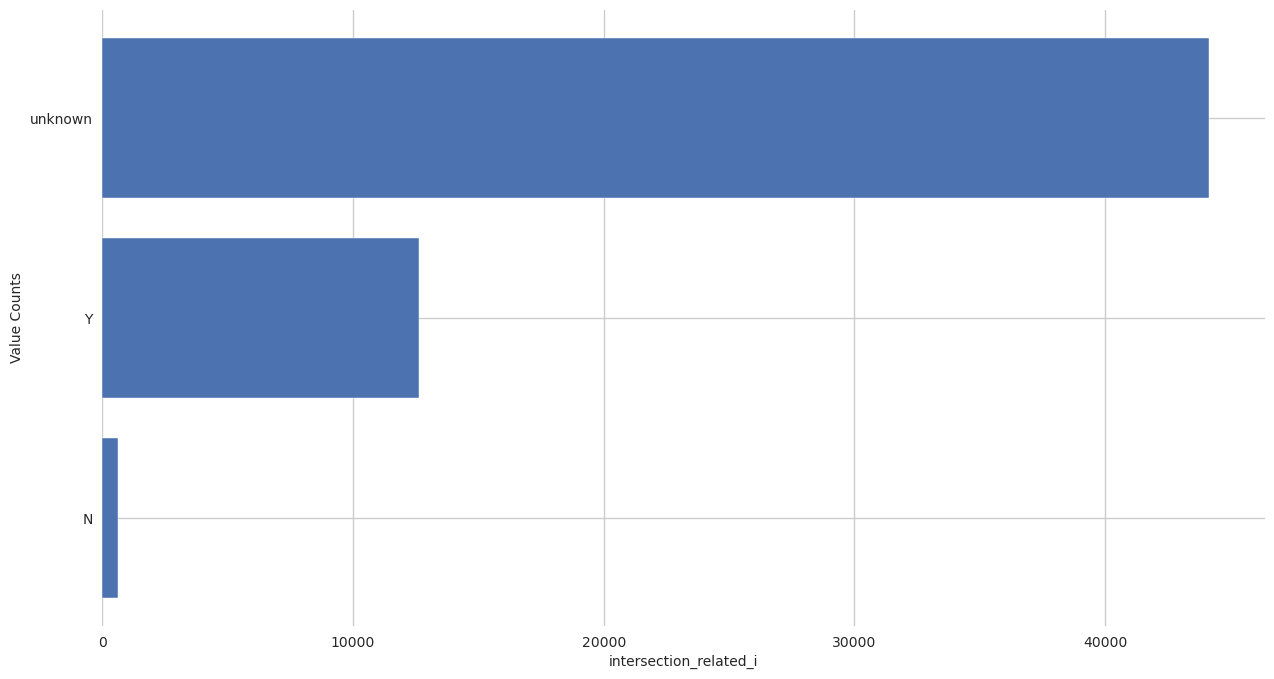

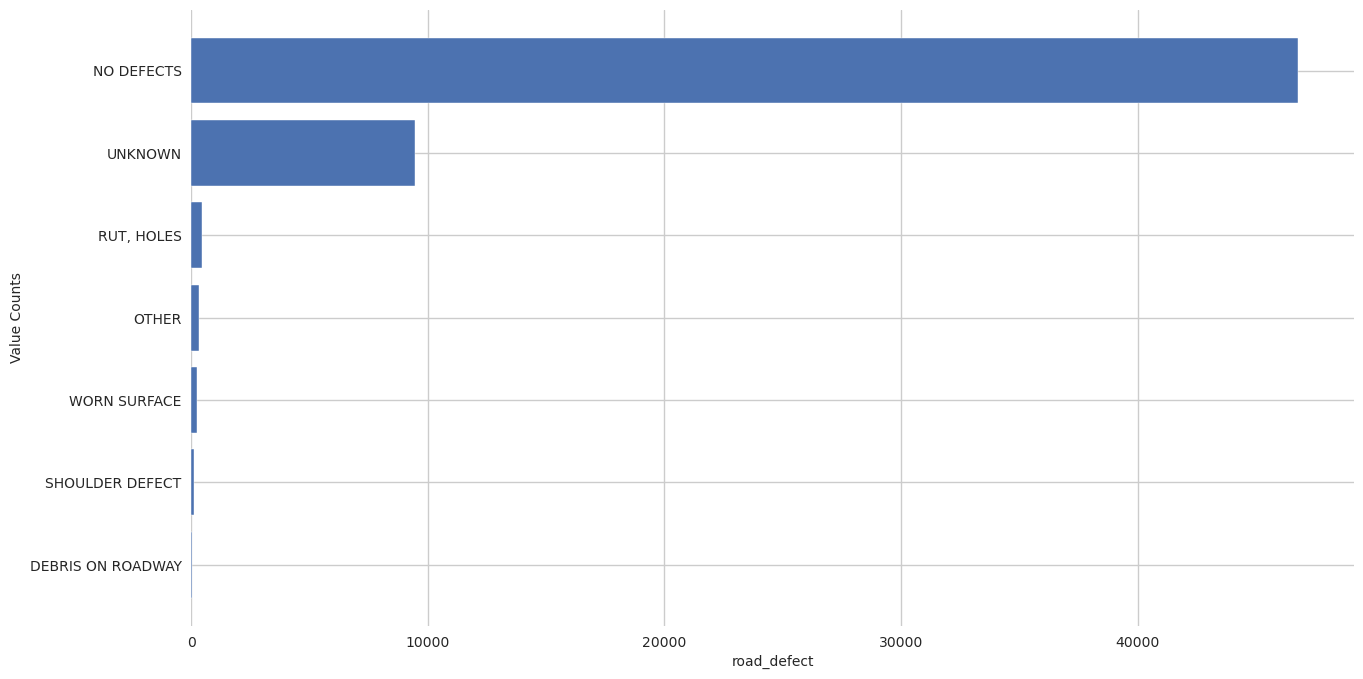

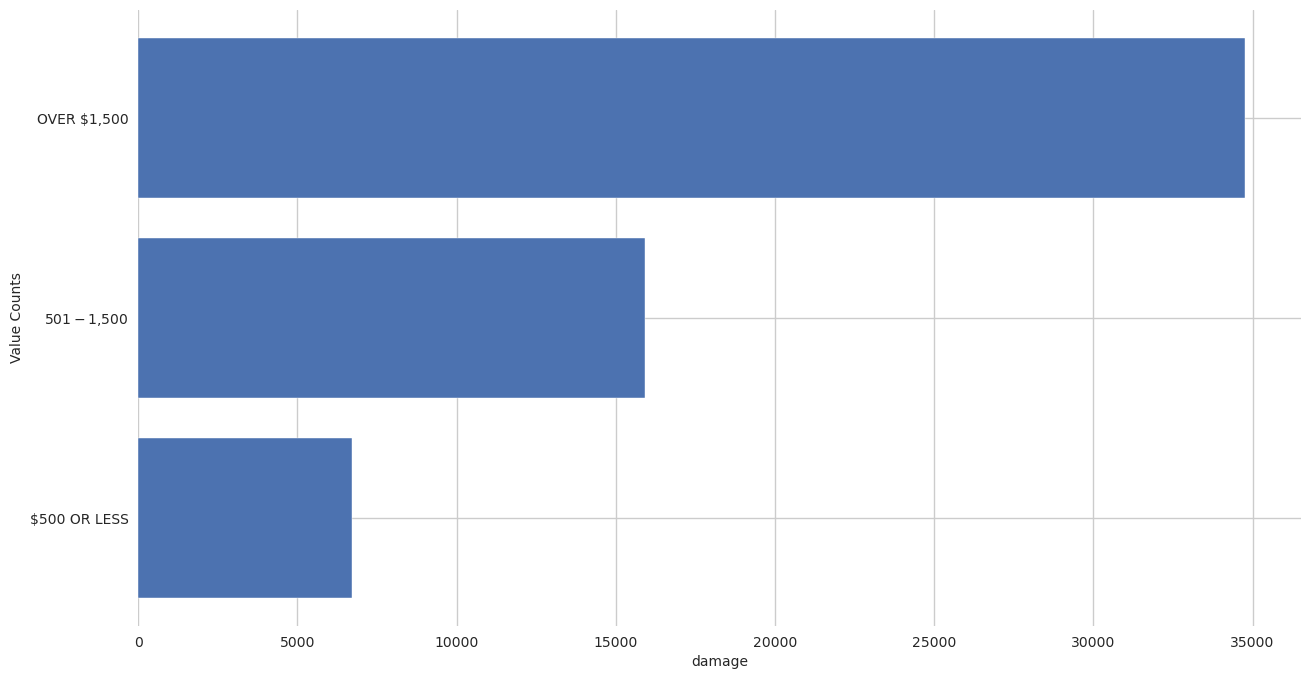

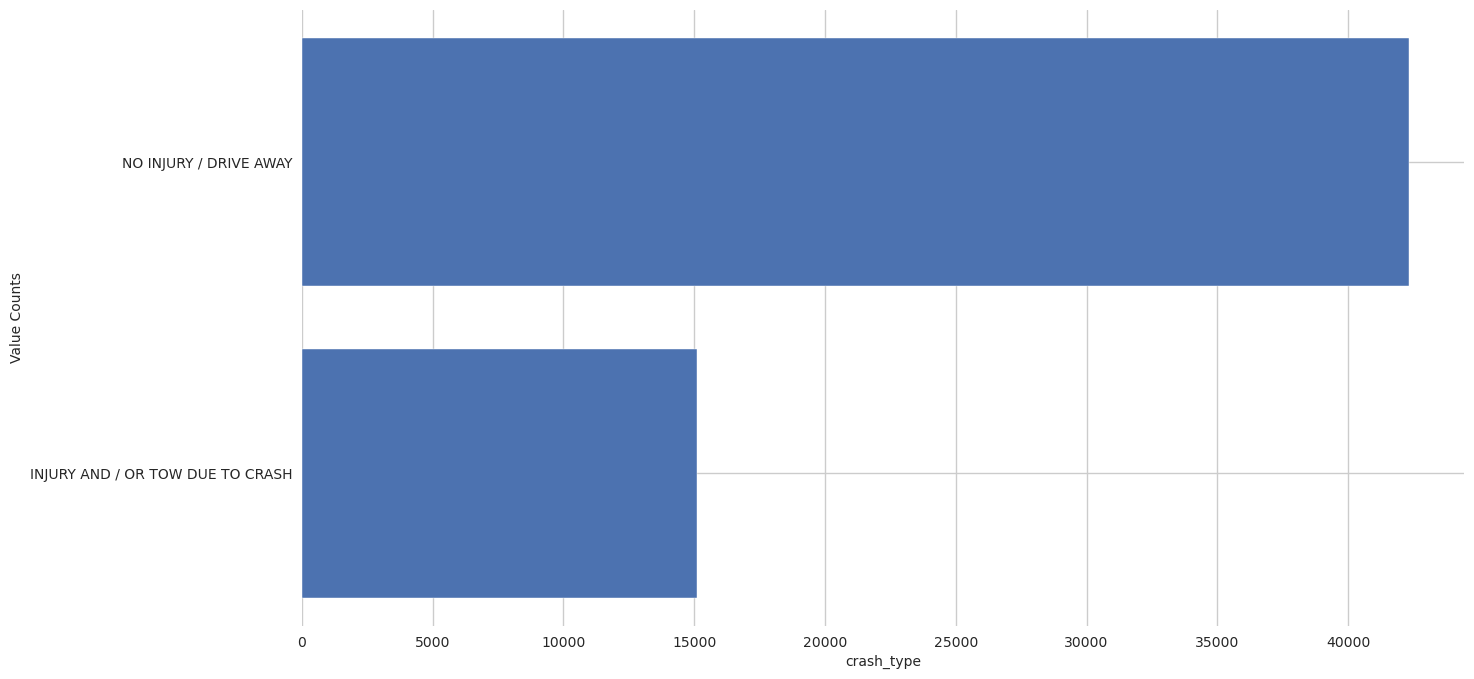

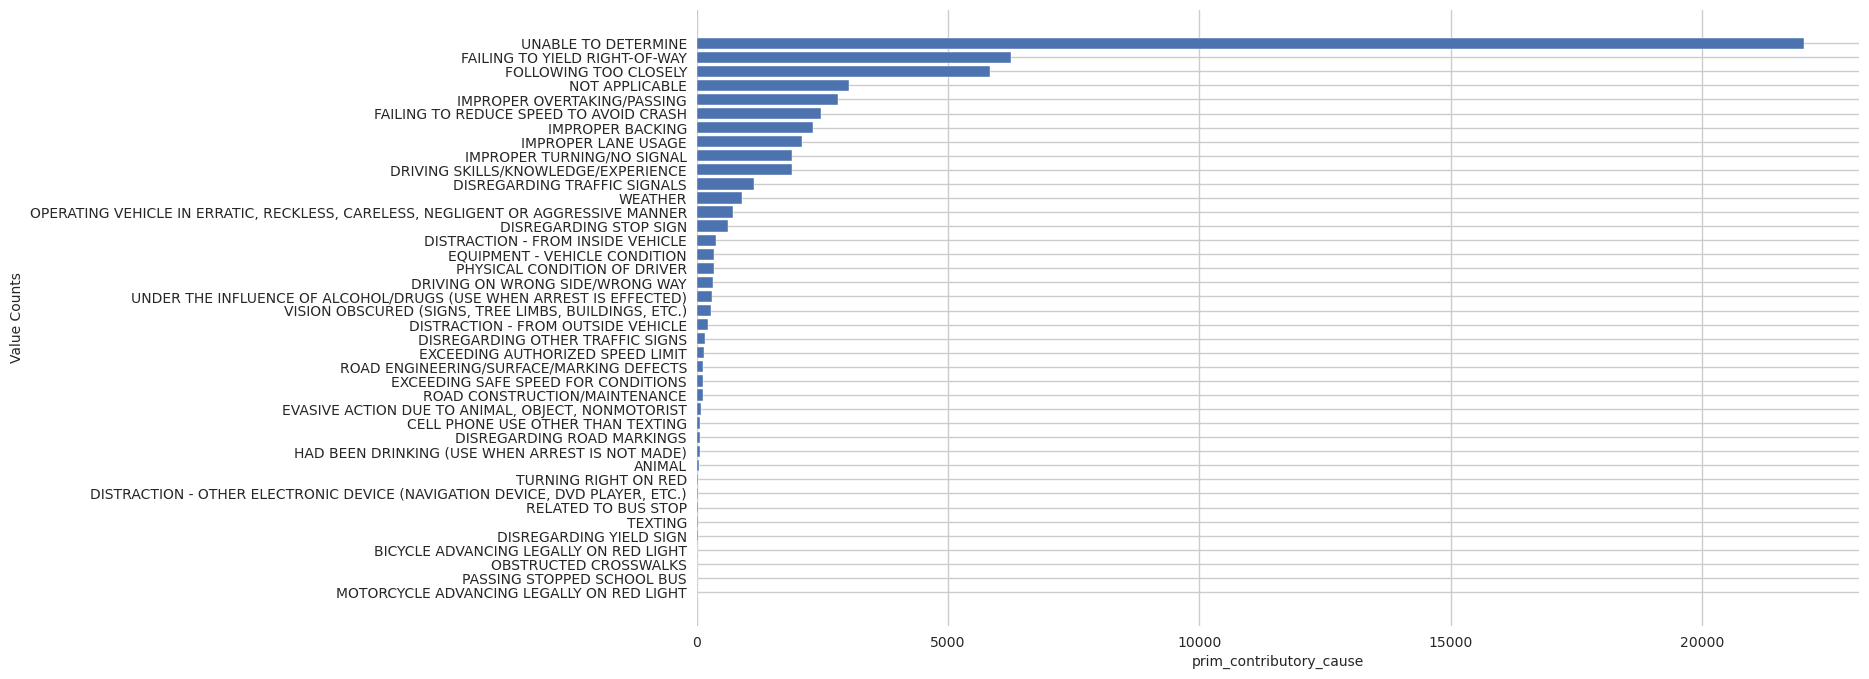

In [265]:
# Display the results for the categorical columns analysis
cat_analysis(data_cat)

In [137]:
"""
Categorical columns notes:
    - Most of the accidents took place in location which is not under construction.
    - Accidents occuring as a result of opening car doors are extremely minimal.
    - Most of the accidents are happening when there sufficient lighting(Daylight),
      and during a "clear" weather - normal weather, where the road surface is "Dry".
    - Accidents are mostly at areas with no traffic controls. Those at traffic controls,
      the devices are mostly working properly.
    - Depending on the road structure, most accidents occur in two-way-traffic roads.
    - There are minimal damages on the roads, where some of the accidents occur.
    - The defects realised on the road structure are minimal, with less accidents occuring
      in such cases. 

    The accidents on the roads bring about high cost in damages of the structure, as well as
    injuries on the road users.
"""

'\nCategorical columns notes:\n    - Most of the accidents took place in location which is not under construction.\n    - Accidents occuring as a result of opening car doors are extremely minimal.\n    - Most of the accidents are happening when there sufficient lighting(Daylight),\n      and during a "clear" weather - normal weather, where the road surface is "Dry".\n    - Accidents are mostly at areas with no traffic controls. Those at traffic controls,\n      the devices are mostly working properly.\n    - Depending on the road structure, most accidents occur in two-way-traffic roads.\n    - There are minimal damages on the roads, where some of the accidents occur.\n    - The defects realised on the road structure are minimal, with less accidents occuring\n      in such cases. \n\n    The accidents on the roads bring about high cost in damages of the structure, as well as\n    injuries on the road users.\n'

* Numerical Columns

In [138]:
# Function to analyse the numerical columns
def num_analysis(data, col):
    
    val_counts = data[col].value_counts().sort_values(ascending=False)
    # Visualizations
    sns.barplot(data=data, x=val_counts.index, y=val_counts.values)
    plt.xlabel(col)
    plt.ylabel("Distribution")

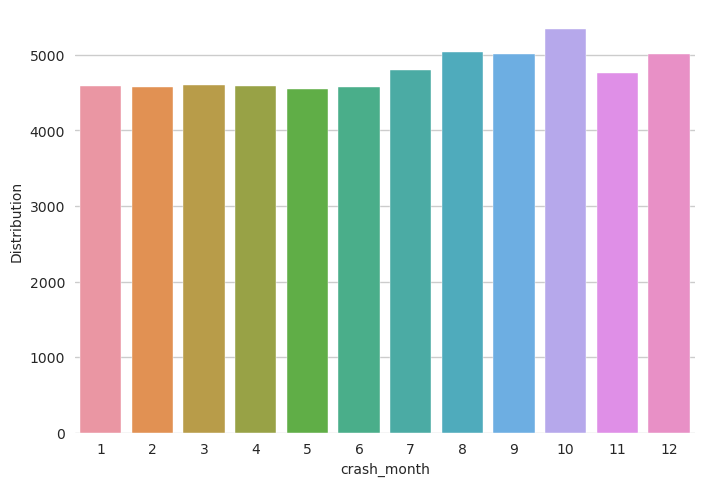

In [139]:
# The crash month analysis
num_analysis(data_num, col="crash_month")

In [140]:
"""
Accident occurrence is independent of seasons, as seen in the above distribution, with
the highest in the last 2nd half of the year.
-- However, in Chicago, the temperature drops below the 17 degrees threshold onwards 
   to December; but has no direct relationship with accident occurence.
"""

'\nAccident occurrence is independent of seasons, as seen in the above distribution, with\nthe highest in the last 2nd half of the year.\n-- However, in Chicago, the temperature drops below the 17 degrees threshold onwards \n   to December; but has no direct relationship with accident occurence.\n'

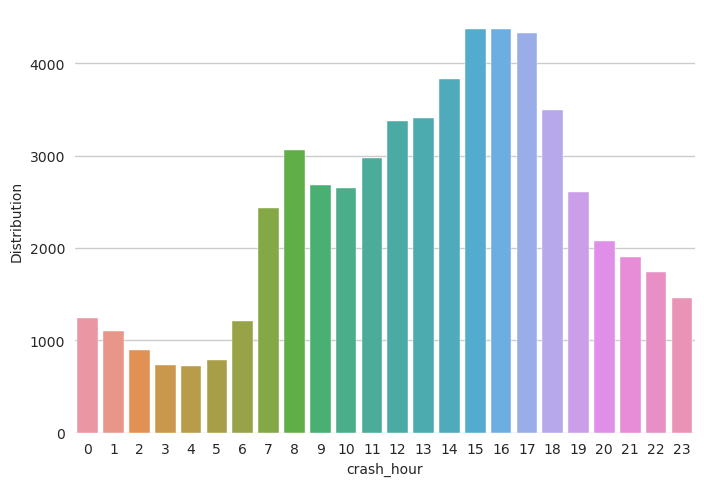

In [141]:
# Crash hour analysis
num_analysis(data_num, col="crash_hour")

In [142]:
"""
Most accidents are occuring during the day, that is between 0700hrs and 1900hrs.
-- This may be the case since we have high traffic volumes during the daya, as 
   compared to night-time.
"""

'\nMost accidents are occuring during the day, that is between 0700hrs and 1900hrs.\n-- This may be the case since we have high traffic volumes during the daya, as \n   compared to night-time.\n'

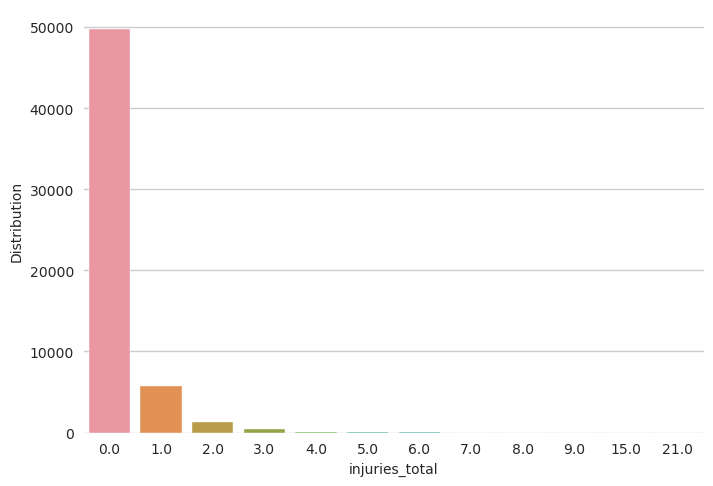

In [143]:
# Visuals for injuries and fatalities columns
num_analysis(data_num, col="injuries_total")

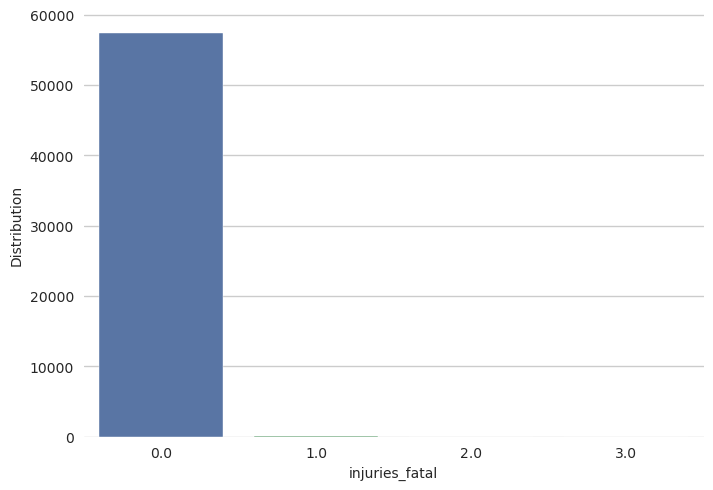

In [144]:
num_analysis(data_num, col="injuries_fatal")

In [145]:
"""
Following that there are majority of the accidents with no fatalities, confirms the 
accuracy of the "injuries_total", where there are minimal injuries.
"""

'\nFollowing that there are majority of the accidents with no fatalities, confirms the \naccuracy of the "injuries_total", where there are minimal injuries.\n'

* Multivariate Analysis

This is the analysis of the relationship between the numerical data and the target variable, "damage".

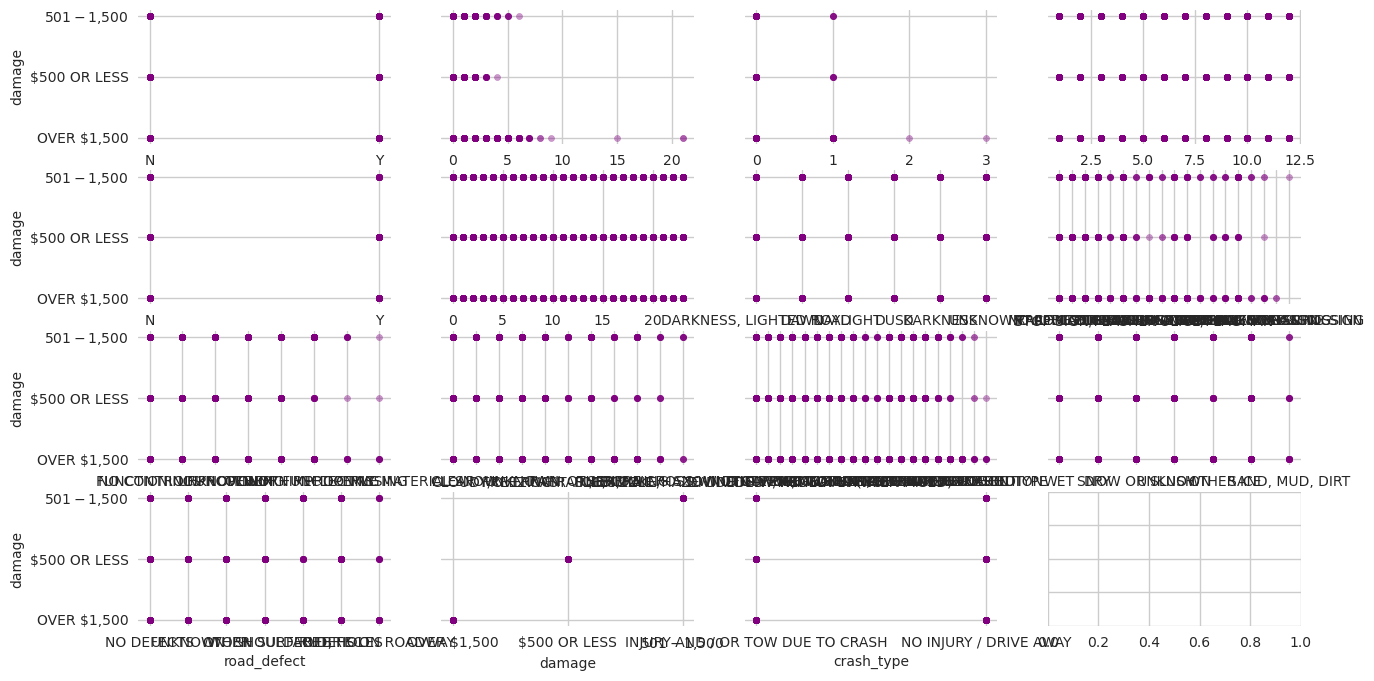

In [256]:
# The relationship between the numerical columns, and the target--"damage"
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15,8))
axes = axes.flatten() # This will allow for easy iteration
for i, col in enumerate(data):
    data.plot(kind='scatter', x=col, y='damage', ax=axes[i], alpha=0.4, color='purple', sharey=True)

plt.show()

In [ ]:
"""
The data is distributed equally within the target class, since it has a relationship
with the independent variables.
The data is categorical in nature, hence the distribution of the data points.
"""

Correlation of the variables

In [147]:
# Determine the correlation between the numerical variables
# Plotting the correlation heatmap
kc_hses_correlation = data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

kc_hses_correlation

,injuries_total,injuries_fatal,crash_month,crash_hour
injuries_total,1.00,0.07,0.01,-0.00
injuries_fatal,0.07,1.00,-0.00,-0.01
crash_month,0.01,-0.00,1.00,0.01
crash_hour,-0.00,-0.01,0.01,1.00


In [ ]:
"""
Our features are not that much correlated, especially since this data is for a classification
task.
"""

# 3. Data Preprocessing

This section entails some of the preprocessing techniques, which are:
* Standardizing: This is scaling our data to ensure that it is of the same unit size, before modelling.
* One-Hot-Encoding: We convert our categoricals dataframes to numeriacal.
* Conduct a train and test split for use in the training and testing of our models respectively.

In [192]:
# Establish the predictor and target variables
X = data.drop(columns=(["damage", "traffic_control_device", "device_condition"]), axis=1)
y = data["damage"]
# Create labels for the target variable using the LabelEncoder
# Instantiate the class
label = LabelEncoder()
# Fit and transform the target class
y_trans = label.fit_transform(y)
# Flatten the array for good shape
y_trans = y_trans.flatten()
# Add the data transformed to the target variable
data["damage"] = y_trans
y = data["damage"]
# One-Hot-Encoding the categorical columnsusing the pandas get dummies method
data_ohe = pd.get_dummies(X, drop_first=True)
X = data_ohe
# Visualize the data
X.head()

,injuries_total,injuries_fatal,crash_month,crash_hour,work_zone_i_Y,dooring_i_Y,"lighting_condition_DARKNESS, LIGHTED ROAD",lighting_condition_DAWN,lighting_condition_DAYLIGHT,lighting_condition_DUSK,...,roadway_surface_cond_SNOW OR SLUSH,roadway_surface_cond_UNKNOWN,roadway_surface_cond_WET,road_defect_NO DEFECTS,road_defect_OTHER,"road_defect_RUT, HOLES",road_defect_SHOULDER DEFECT,road_defect_UNKNOWN,road_defect_WORN SURFACE,crash_type_NO INJURY / DRIVE AWAY
0,0.0,0.0,10,23,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0.0,0.0,11,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,5,5,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,0.0,6,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0.0,5,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [172]:
"""
The target variable "damage"=y: is represented as follows:
2    34770 -- OVER $1,500
1    15927 -- $501 - $1,500
0     6721 -- $500 OR LESS
Name: damage, dtype: int64
"""

'\nThe target variable "damage"=y: is represented as follows:\n    <bound method IndexOpsMixin.value_counts of 0        2\n1        2\n2        0\n3        2\n4        2\n        ..\n59993    1\n59994    2\n59995    2\n59998    1\n59999    1\nName: damage, Length: 57418, dtype: int64> \n'

In [193]:
# First, we split our data with the test size set to 25%
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=123)

#### Scaling our data

In [194]:
# Our data will be scaled using sklearn's StandardScaler
# Instantiate our class
scaler = StandardScaler()
# Fit and transform the X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform the X_test
X_test_scaled = scaler.transform(X_test)

In [184]:
"""
Having done preprocessing of the data, we can move on to modelling.
"""

'\nHaving done preprocessing of the data, we can move on to modelling.\n'

# 4. Modelling

In this section, we will perform modelling with the various classification techniques which include:
* Logistic Regression
* Decision Trees
* KNearest Neighbors
* Ensemble Methods
Through these models, we will adopt the best performing following the various accuracy measurement methods such as "accuracy", to come up with the final model

#### 4.1 Logistic Regression


In [250]:
# Creating an initial model
def logit(X_train, X_test, y_train, y_test):
    # Instantiate the base model with default parameters, and solve="saga", l1-ratio=0.5(to support 
    # elastic-net penalty) and random_state=123
    log_reg = LogisticRegression(solver="saga", C=1e5, random_state=123, l1_ratio=0.5)
    # Ensure that the target class is balanced, by using SMOTE
    # Instantiate SMOTE with a random state, and sampling_strategy=default; and fit it to the training data
    sm = SMOTE(random_state=123)
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Check on the distribution of the majority and minority class for the target
    print("Target class distribution:")
    print(y_t_oversampled.value_counts(normalize=True))
    # Fit the model to the training data
    log_reg.fit(X_t_oversampled, y_t_oversampled)
    # Perform cross-validation on the training set to check on the log_loss of the model
    print("Model Log Loss:")
    print(-cross_val_score(log_reg, 
                            X_t_oversampled, 
                            y_t_oversampled, 
                            scoring="neg_log_loss",
                            cv=5).mean())
    # Check the accuracy of the model
    test_preds = log_reg.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, test_preds))
    # Access the parameters used in the model
    print("Model Parameters:")
    print(log_reg.get_params)
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Target class distribution:
1    0.333333
2    0.333333
0    0.333333
Name: damage, dtype: float64
Model Log Loss:
1.052280358210234
Accuracy Score: 0.4489028213166144
Model Parameters:
<bound method BaseEstimator.get_params of LogisticRegression(C=100000.0, l1_ratio=0.5, random_state=123, solver='saga')>


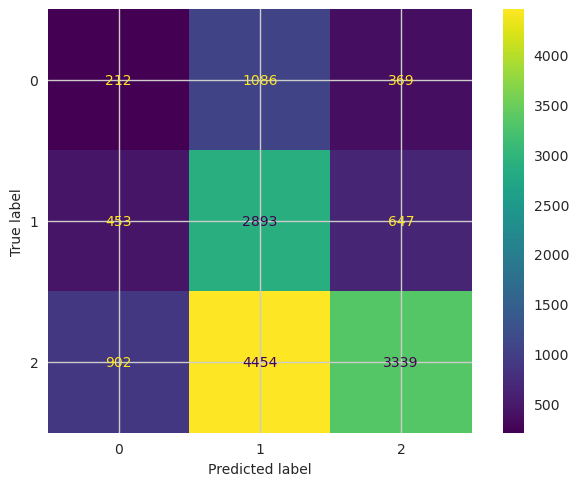

In [251]:
# Execute the logistic regression model
logit(X_train_scaled, X_test_scaled, y_train, y_test)

In [211]:
"""
Results from my logistic regression model:
    -- The data class imbalance was successfully tectified.
    -- The log_loss of the model is good, at a value of 1.05(3dp).
    -- The accuracy of our model is around 45%, which minimal, and can be improved through
       other modelling techniques.
    -- Our model has several false positives, which can be improved using other models.
"""

'\nResults from my logistic regression model:\n    -- The data class imbalance was successfully tectified.\n    -- The log_loss of the model is good, at a value of 1.05(3dp).\n    -- The accuracy of our model is around 45%, which minimal, and can be improved through\n       other modelling techniques.\n    -- Our model has several false positives, which can be improved using other models.\n'

#### 4.2 Decision Trees

Using DecisionTreeClassifier, we will try to fit and evaluate our data, with the aim of improving the model performance.

In [221]:
# Function for decision tree model, set with default parameters, to check on general model performance
def d_tree(X_train, X_test, y_train, y_test):
    # Instantiate the model with a random_state=123, and default parameters
    tree = DecisionTreeClassifier(random_state=123)
     # Ensure that the target class is balanced, by using SMOTE
    # Instantiate SMOTE with a random state, and sampling_strategy=default; and fit it to the training data
    sm = SMOTE(random_state=123)
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data
    tree.fit(X_t_oversampled, y_t_oversampled)
    print("Model Parameters:")
    print(tree.get_params)
    print("------------------------------")
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(tree, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    test_preds = tree.predict(X_test)
    print("Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model Parameters:
<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=123)>
------------------------------
Model Log_loss:
8.457570771461949
Model Accuracy:
0.45419714385231624


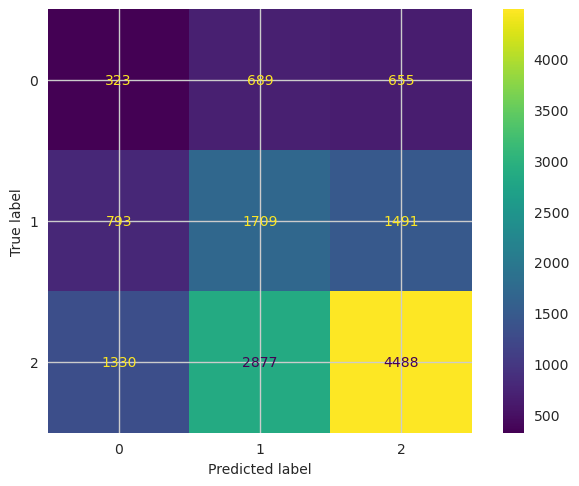

In [222]:
# Display the results for the Decision Tree Classifier
d_tree(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
""""
-- The model has improved slightly from our Logistic Regression model.
-- The log_loss of our model is however high, which is worse than the first model
-- The predictions done by this model is much better, with the true positives being high.
-- This model might do better by ttuning-changing the default parameters.
"""

#### 4.3 KNearest Model

This model will be fed the default parameter, observe the results, and compare it to the other models.

In [230]:
# Create a function that creates and evaluates the KNN model
def knn(X_train, X_test, y_train, y_test):
    # Build the model with the default parameters
    # Instantiate the model with default parameters
    knn_model = KNeighborsClassifier()
    # Use SMOTE to solve for class imbalance
    sm = SMOTE()
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data
    knn_model.fit(X_t_oversampled, y_t_oversampled)
    print("Model Parameters:")
    print(knn_model.n_neighbors)
    print("------------------------------")
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(knn_model, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    test_preds = knn_model.predict(X_test)
    print("Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model Parameters:
5
------------------------------
Model Log_loss:
4.523638500329492
Model Accuracy:
0.4381051898293278


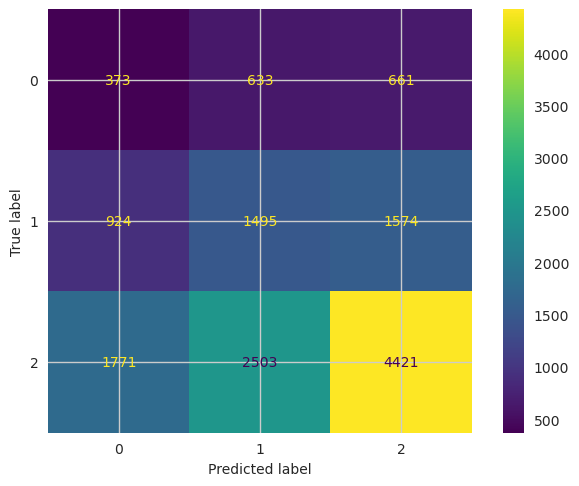

In [231]:
# Display and evaluate the KNN model using its function
knn(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
"""
This model is doing much better than the DecisionTree model
-- The log_loss value is lower than the previous model
-- We can try adjusting the n_neighbors parameter, and check the effect on our data
-- Since our data is large, we can increase n_neighbors 10x to 50 
"""

In [232]:
# Create a function that creates and evaluates the KNN model
def knn(X_train, X_test, y_train, y_test):
    # Build the model with the default parameters
    # Instantiate the model with default parameters
    knn_model = KNeighborsClassifier(n_neighbors=50)
    # Use SMOTE to solve for class imbalance
    sm = SMOTE()
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data
    knn_model.fit(X_t_oversampled, y_t_oversampled)
    print("Model Parameters:")
    print(knn_model.n_neighbors)
    print("------------------------------")
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(knn_model, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    test_preds = knn_model.predict(X_test)
    print("Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model Parameters:
50
------------------------------
Model Log_loss:
1.0367048703713215
Model Accuracy:
0.39045628700801116


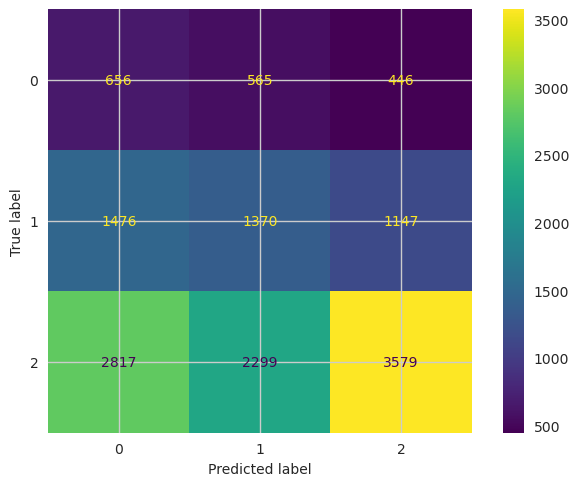

In [233]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
"""
By increasing the n_neighbors to 50, our overall modell performance has improved, with the log_loss
decreasing by around 3units.
However, the accuracy of our model has declined, following the predictions of false positives having
increase.
-- We can examine ensemble methods, with the aim of obtaining an improved version of our model.
"""

#### 4.4 Ensemble Methods: Random Forest

In [237]:
# We define a function to perform class balancing, and creating a model using RandomForestClassifier
def forest(X_train, X_test, y_train, y_test):
    # Create a function that creates and evaluates the RandomForest model
    # Instantiate the model with default parameters
    forest_model = RandomForestClassifier(random_state=123)
    # Use SMOTE to solve for class imbalance
    sm = SMOTE()
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data
    forest_model.fit(X_t_oversampled, y_t_oversampled)
    print("Model Parameters:")
    print(forest_model.n_estimators)
    print("------------------------------")
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(forest_model, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    test_preds = forest_model.predict(X_test)
    print("Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model Parameters:
100
------------------------------
Model Log_loss:
1.2461387321919477
Model Accuracy:
0.4789968652037618


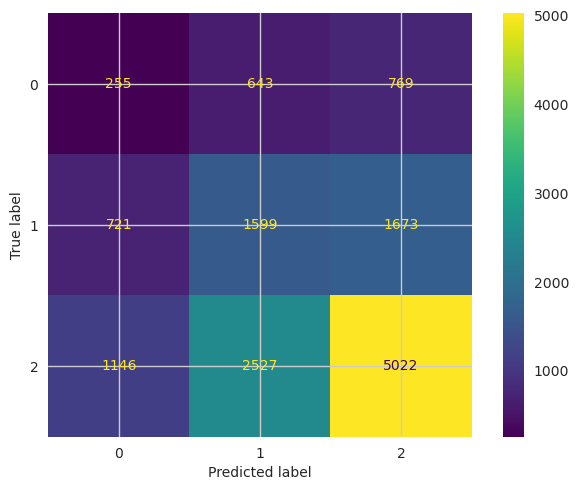

In [239]:
# Display and evaluate the forest_model
forest(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
"""
This model is much better than the initial models, with the following results
-- Model log loss: 1.25
-- Model accuracy: 48%
This model could be improved by tuning--changing the hyper-parameters.
-- We will attempt another defaul-parameter model--xgboost--before selecting one and tuning it for
   use in our project.
"""

#### XG-Boost Ensemble Method


In [243]:
# Define a function to use in the XG-Boost model
def xg_boost(X_train, X_test, y_train, y_test):
    # Instantiate the model, with its default parameters
    xgb_model = XGBClassifier()
    #  # Use SMOTE to solve for class imbalance
    sm = SMOTE()
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data
    xgb_model.fit(X_t_oversampled, y_t_oversampled)
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(xgb_model, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    # Training set accuracy
    print("Training Model Accuracy:")
    print(accuracy_score(y_t_oversampled, xgb_model.predict(X_t_oversampled)))
    test_preds = xgb_model.predict(X_test)
    print("Test Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Model Log_loss:
0.8681257426273004
Training Model Accuracy:
0.641061041866411
Test Model Accuracy:
0.5338906304423546


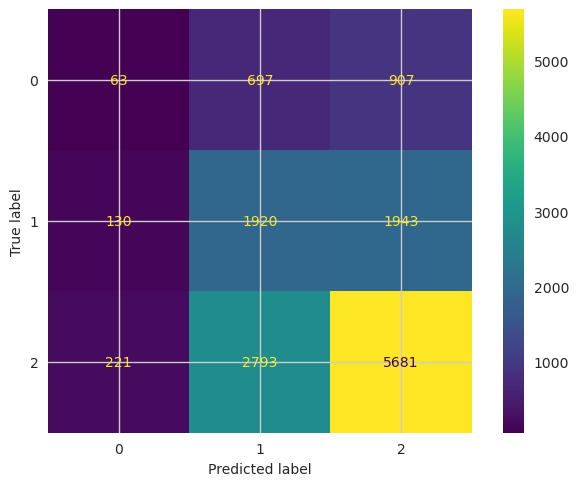

In [244]:
# Display the xg_boost model for evaluation
xg_boost(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
"""
This is the best model so far, with the best accuracy score for both the training and the test data,
however, it is overfitting, but can be improved through tuning
The overall model performance is good, with the test data accuracy at around 54%, and a minimum log_loss
of around 0.87(2dp).
-- Following the above results, we are going to use the xg_boost model as our final model, and improve
   it(tuning).
"""

#### Final Model

For our final model using Xg_boost, we will perform a grid search on our data, and come up with the optimal parameters, for our final model for deployment.

In [246]:
# Create a function to perform a grid search, and create a model using the obtained parameters
def xg_tuned(X_train, X_test, y_train, y_test):                
    # Instantiate the xg_boost model
    xg_boost = XGBClassifier()
    # Create a parameter grid for the specific tuning items
    param_grid = {
            "learning_rate": [0.1, 0.2],
            "max_depth": [7, 8],
            "min_child_weight": [2],
            "subsample": [0.5, 0.7],
            "n_estimators": [100]
    }
    # Initialize grid search for the defined parameters
    grid_clf = GridSearchCV(estimator=xg_boost,
                            param_grid=param_grid,
                            scoring="accuracy",
                            cv=5,
                            n_jobs=1)
    # Eliminate class imbalance using SMOTE
    # Instantiate the method, and fit it to the data
    sm = SMOTE()
    X_t_oversampled, y_t_oversampled = sm.fit_resample(X_train, y_train)
    # Fit the model to the training data 
    grid_clf.fit(X_t_oversampled, y_t_oversampled)
    # Check the best parameters obtained from the grid search
    best_parameters = grid_clf.best_params_
    print("Grid Search Best Params:")
    for param_name in sorted(best_parameters.keys()):
        print('%s: %r' % (param_name, best_parameters[param_name]))    
    # Perform cross_validation on the model to check its log_loss value
    print("Model Log_loss:")                        
    print(-cross_val_score(grid_clf, 
                           X_t_oversampled,
                           y_t_oversampled,
                           scoring="neg_log_loss",
                           cv=5).mean())
    # Check the model accuracy
    # Training set accuracy
    print("Training Model Accuracy:")
    print(accuracy_score(y_t_oversampled, grid_clf.predict(X_t_oversampled)))
    test_preds = grid_clf.predict(X_test)
    print("Test Model Accuracy:")
    print(accuracy_score(y_test, test_preds))
    # Plot a confusion matrix to visualize the actual and predicted values
    cm = confusion_matrix(y_test, test_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot()

Grid Search Best Params:
learning_rate: 0.2
max_depth: 8
min_child_weight: 2
n_estimators: 100
subsample: 0.7
Model Log_loss:
0.8552400920059673
Training Model Accuracy:
0.6692233940556088
Test Model Accuracy:
0.5290142807384187


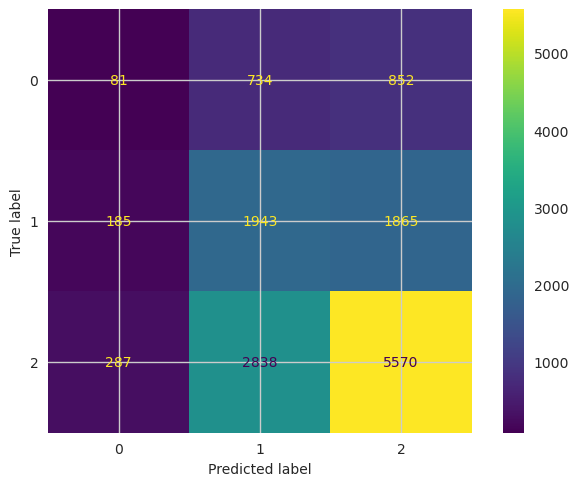

In [247]:
# Check on the results of the final model using the difined function
xg_tuned(X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
"""
-- The model having been tuned, has the same accuracy as before, however, it is slightly
   overfitting the data, as previously noted.
-- The model log_loss has improved slightly, with the new value being0.85(2dp).
-- The predictive degree of the true positives has improved genarally, through all
   the categories.
-- Since this is a much better model compared to the others, we will use it as our 
   final model.
"""

# 5. Conclusions


From the above analysis of the `Traffic Crashes of Chicago`, we come up with the following conclusions:
* The prediction of the damages incurred in traffic accident incidences are as follows:
* > 2 -- OVER $1,500
* > 1 -- $501 - $1,500
* > 0 -- $500 OR LESS
* Some of the leading contributors to traffic accidents within the city are:
* > Absence of traffic control devices/ personnel
* > The driving skills of the drivers, since most of the accidents are occuring during the day(sufficient lighting), normal weather condition(clear weather), normal functioning traffic control devices, and roads with no defects. This is also as observed from the primary contributory cause of the accidents.
* > Most of the accidents that are taking place during the day, ara between 7am and 7pm, which can be connected to the increased traffic volumes during the day.
* > There are other accidents that are occuring as a result of presence of road defects, poor lighting especially at night, defective traffic controls, and poor road surface condition(wet surface, snow, and rain), especially during the last quarter of the year.

# Recommenations

Following the above conclusions from our analysis, we can recommend the following to the Chicago government and traffic control:
* Increase the number of traffic controls, and personnel on all of its roads, especially at intersections where accidents are most likely to occur- optimize traffic-light management.
* Find a solution to the growing traffic volumes, especially during the day- some of these may be soughting for alternative routes, road-expansion, among others.
* Deploy CCTVs on every roadway, to help in monitoring any road defects, and further pushing for periodic maintenance operations.
* Enforce the existing traffic laws throughout the city.
* Improve the general roadway conditions such as lighting, clearing the roads(during winter), and road markings especially in two-way traffic.